<a href="https://colab.research.google.com/github/Temple2001/ML_practice/blob/main/codes/DeepLearning_practice_5_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataGeneration class 를 이용한 Diabetes 구현


In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
class Diabetes:

    def __init__(self, name, input_nodes, hidden1_nodes, output_nodes, learning_rate):
        self.name = name
        
        self.W2 = np.random.rand(input_nodes, hidden1_nodes)
        self.b2 = np.random.rand(hidden1_nodes)

        self.W3 = np.random.rand(hidden1_nodes, output_nodes)
        self.b3 = np.random.rand(output_nodes)

        self.learning_rate = learning_rate

        print(self.name, ' is created !!!')
    
    def feed_forward(self):
        delta = 1e-7

        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        return -np.sum(self.target_data*np.log(y+delta)+(1-self.target_data)*np.log((1-y)+delta))
    
    def loss_val(self):
        delta = 1e-7

        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        return -np.sum(self.target_data*np.log(y+delta)+(1-self.target_data)*np.log((1-y)+delta))

    def predict(self, input_data):
        z2 = np.dot(input_data, self.W2) + self.b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        if y >= 0.5:
            result = 1
        else:
            result = 0
        
        return y, result
    
    def accuracy(self, input_data, target_data):
        matched_list = []
        not_matched_list = []

        for index in range(len(input_data)):
            (real_val, logical_val) = self.predict(input_data[index])

            if logical_val == target_data[index]:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
        
        accuracy_val = len(matched_list) / len(input_data)

        return accuracy_val
    
    def train(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data

        f = lambda x : self.feed_forward()

        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
    
        self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
        
        self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
    
        self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

In [3]:
class DataGeneration:

    def __init__(self, name, file_path, seperation_rate, target_position=-1):
        self.name = name
        self.file_path = file_path
        self.seperation_rate = seperation_rate

        if (target_position == -1 or target_position == 0):
            self.target_position = target_position
        else:
            err_str = 'target_position must be -1 or 0'
            raise Exception(err_str)
    
    def __display_target_distribution(self, data, str_of_kind='original data'):
        print('=========================================================================================')

        target_data = data[:, self.target_position]

        unique, counts = np.unique(target_data, return_counts='True')

        unique_target = []

        for index in range(len(unique)):
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
            unique_target.append(unique[index])
        
        for index in range(len(unique_target)):
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100*counts[index] / (target_data.shape[0]), 2), ' %')

        print('=========================================================================================')
    
    def generate(self):
        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))
        
        print('[DataGeneration] loaded_data.shape = ', loaded_data.shape)

        self.__display_target_distribution(loaded_data, 'original data')

        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data)*self.seperation_rate)

        np.random.shuffle(loaded_data)

        test_data = loaded_data[0:test_data_num]

        training_data = loaded_data[test_data_num:]

        self.__display_target_distribution(training_data, 'training data')
        self.__display_target_distribution(test_data, 'test data')

        return training_data, test_data

**분리비율 0.4**

In [4]:
test_seperation_rate = 0.4

try:
    data_obj = DataGeneration('Diabetes', 'diabetes.csv', test_seperation_rate)
    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration] loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  162
[DataGeneration] unique number of training data =  1.0 , count =  294
[DataGeneration] unique number of training data =  0.0 , ratio =  35.53  %
[DataGeneration] unique number of training data =  1.0 , ratio =  64.47  %
[DataGeneration] unique number of test data =  0.0 , count =  101
[DataGeneration] unique number of test data =  1.0 , count =  202
[DataGeneration] unique number of test data =  0.0 , ratio =  33.33  %
[DataGeneration] unique number of test data =  1.0 , ratio =  66.67  %
training data.shape =  (456, 9)
test data.shape =  (303, 9)


In [6]:
i_nodes = training_data.shape[1] - 1
h1_nodes = 20
o_nodes = 1
lr = 1e-2
epochs = 20

loss_val_list = []
accuracy_val_list = []
validation_accuracy_val_list = []

obj1 = Diabetes('Diabetes', i_nodes, h1_nodes, o_nodes, lr)

print('Neural Network Learning using Numerical Derivative...')

start_time = datetime.now()

for step in range(epochs):
    for index in range(len(training_data)):
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]

        obj1.train(input_data, target_data)
    
    cur_loss_val = obj1.loss_val()
    loss_val_list.append(cur_loss_val)
    training_accuracy = obj1.accuracy(training_data[:,0:-1],training_data[:,-1])
    validation_accuracy = obj1.accuracy(test_data[:,0:-1], test_data[:,-1])

    print('============================================================================')
    print('step = ', step, ',                 current loss value = ', cur_loss_val, '\n')
    print('step = ', step, ', [training data] accuracy value = ', np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)

    print('step = ', step, ', [validation data] accuracy value = ', np.round(100*validation_accuracy, 4), ' %')

    validation_accuracy_val_list.append(validation_accuracy)

print('============================================================================')

end_time = datetime.now()

print('')
print('Elapsed time => ', end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0 ,                 current loss value =  0.5475366198279485 

step =  0 , [training data] accuracy value =  61.4035  %
step =  0 , [validation data] accuracy value =  64.3564  %
step =  1 ,                 current loss value =  0.5285359377328682 

step =  1 , [training data] accuracy value =  64.4737  %
step =  1 , [validation data] accuracy value =  66.6667  %
step =  2 ,                 current loss value =  0.4915684673873013 

step =  2 , [training data] accuracy value =  64.4737  %
step =  2 , [validation data] accuracy value =  66.6667  %
step =  3 ,                 current loss value =  0.4596262908270728 

step =  3 , [training data] accuracy value =  64.693  %
step =  3 , [validation data] accuracy value =  66.6667  %
step =  4 ,                 current loss value =  0.4319507186879421 

step =  4 , [training data] accuracy value =  66.4474  %
step =  4 , [validation data] accuracy value =

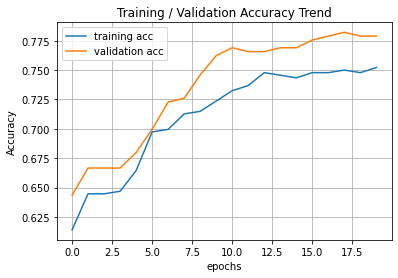

In [7]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')
plt.show()

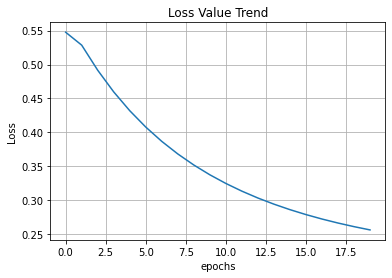

In [8]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

**분리비율 0.3**

In [10]:
test_seperation_rate = 0.3

try:

    data_obj = DataGeneration('Diabetes', 'diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration] loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  191
[DataGeneration] unique number of training data =  1.0 , count =  341
[DataGeneration] unique number of training data =  0.0 , ratio =  35.9  %
[DataGeneration] unique number of training data =  1.0 , ratio =  64.1  %
[DataGeneration] unique number of test data =  0.0 , count =  72
[DataGeneration] unique number of test data =  1.0 , count =  155
[DataGeneration] unique number of test data =  0.0 , ratio =  31.72  %
[DataGeneration] unique number of test data =  1.0 , ratio =  68.28  %
training data.shape =  (532, 9)
test data.shape =  (227, 9)


In [11]:
i_nodes = training_data.shape[1] - 1
h1_nodes = 20
o_nodes = 1
lr = 1e-2
epochs = 20

loss_val_list = []
accuracy_val_list = []
validation_accuracy_val_list = []

obj1 = Diabetes('Diabetes', i_nodes, h1_nodes, o_nodes, lr)

print('Neural Network Learning using Numerical Derivative...')

start_time = datetime.now()

for step in range(epochs):
    for index in range(len(training_data)):
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]

        obj1.train(input_data, target_data)
    
    cur_loss_val = obj1.loss_val()
    loss_val_list.append(cur_loss_val)
    training_accuracy = obj1.accuracy(training_data[:,0:-1],training_data[:,-1])
    validation_accuracy = obj1.accuracy(test_data[:,0:-1], test_data[:,-1])

    print('============================================================================')
    print('step = ', step, ',                 current loss value = ', cur_loss_val, '\n')
    print('step = ', step, ', [training data] accuracy value = ', np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)

    print('step = ', step, ', [validation data] accuracy value = ', np.round(100*validation_accuracy, 4), ' %')

    validation_accuracy_val_list.append(validation_accuracy)

print('============================================================================')

end_time = datetime.now()

print('')
print('Elapsed time => ', end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0 ,                 current loss value =  0.8847827933899569 

step =  0 , [training data] accuracy value =  52.8195  %
step =  0 , [validation data] accuracy value =  58.5903  %
step =  1 ,                 current loss value =  0.7743191233774512 

step =  1 , [training data] accuracy value =  65.9774  %
step =  1 , [validation data] accuracy value =  68.2819  %
step =  2 ,                 current loss value =  0.6967353902551968 

step =  2 , [training data] accuracy value =  71.6165  %
step =  2 , [validation data] accuracy value =  73.5683  %
step =  3 ,                 current loss value =  0.6294262116257345 

step =  3 , [training data] accuracy value =  73.8722  %
step =  3 , [validation data] accuracy value =  77.533  %
step =  4 ,                 current loss value =  0.5697861779351342 

step =  4 , [training data] accuracy value =  75.3759  %
step =  4 , [validation data] accuracy value =

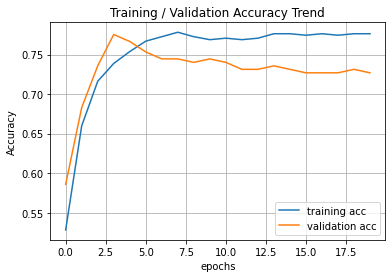

In [12]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

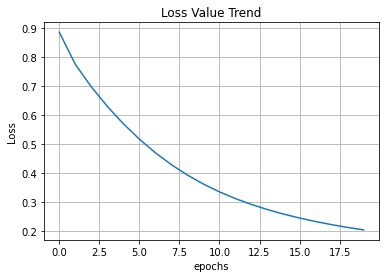

In [13]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

**분리비율 0.8**

In [14]:
test_seperation_rate = 0.8 

try:

    data_obj = DataGeneration('Diabetes', 'diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration] loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  55
[DataGeneration] unique number of training data =  1.0 , count =  97
[DataGeneration] unique number of training data =  0.0 , ratio =  36.18  %
[DataGeneration] unique number of training data =  1.0 , ratio =  63.82  %
[DataGeneration] unique number of test data =  0.0 , count =  208
[DataGeneration] unique number of test data =  1.0 , count =  399
[DataGeneration] unique number of test data =  0.0 , ratio =  34.27  %
[DataGeneration] unique number of test data =  1.0 , ratio =  65.73  %
training data.shape =  (152, 9)
test data.shape =  (607, 9)


In [15]:
i_nodes = training_data.shape[1] - 1
h1_nodes = 20
o_nodes = 1
lr = 1e-2
epochs = 20

loss_val_list = []
accuracy_val_list = []
validation_accuracy_val_list = []

obj1 = Diabetes("Diabetes", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])
    
    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  0.16403424396688968 

step =  0 [training data] accuracy value =  63.8158  %
step =  0 [validation data] accuracy value =  65.7331  %
step =  1             current loss value =  0.463115873211226 

step =  1 [training data] accuracy value =  63.8158  %
step =  1 [validation data] accuracy value =  65.7331  %
step =  2             current loss value =  0.5727260439016937 

step =  2 [training data] accuracy value =  59.8684  %
step =  2 [validation data] accuracy value =  64.0857  %
step =  3             current loss value =  0.5891436179557599 

step =  3 [training data] accuracy value =  63.8158  %
step =  3 [validation data] accuracy value =  65.7331  %
step =  4             current loss value =  0.5865864142358894 

step =  4 [training data] accuracy value =  63.8158  %
step =  4 [validation data] accuracy value =  65.7331  %
step =  5             current loss v

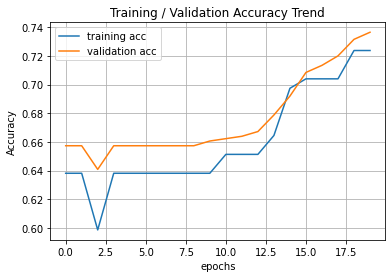

In [16]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

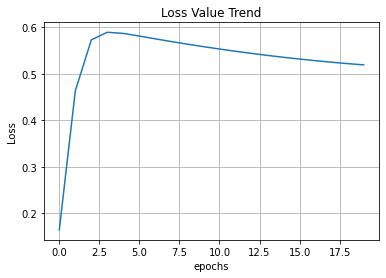

In [17]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()